## 1 - Introduction
This notebook is for clean the dataset downloaded from Lending Club website.

## 2 - Dataset

The dataset was download from [Lending Club](https://www.lendingclub.com/statistics/additional-statistics?). It contains information from 2015 to 2019. 

**Data manipulation**: 

    - Deal with missing value 
    - Remove outliner
    - observe distribution



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import time

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [102]:
# read data
start = time.time()
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
df = pd.read_csv(path+'data_col_pickup.csv', low_memory=True, index_col=0, \
                 parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year'] )
end = time.time()
print('It takes  ' + str(end-start) +' sec to read the data')

It takes  39.1493182182312 sec to read the data


In [103]:
df.head()

,issue_d,earliest_cr_line,last_pymnt_d,issue_year,int_rate,revol_util,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,loan_amnt,funded_amnt,installment,annual_inc,int_rate.1,dti,revol_bal,delinq_2yrs,open_acc,pub_rec,fico_range_high,fico_range_low,total_pymnt,recoveries
0,2015-12-01,2005-01-01,2018-08-01,2015-01-01,13.99,87.4,60 months,C,< 1 year,RENT,Source Verified,Fully Paid,credit_card,OH,21000.0,21000.0,488.53,52000.0,13.99,14.47,20374.0,0.0,5.0,0.0,684.0,680.0,27285.807861,0.0
1,2015-12-01,1997-06-01,2020-01-01,2015-01-01,12.88,24.1,60 months,C,10+ years,MORTGAGE,Not Verified,Current,debt_consolidation,MO,16800.0,16800.0,381.23,118000.0,12.88,34.29,7849.0,0.0,11.0,1.0,684.0,680.0,18650.220000,0.0
2,2015-12-01,1995-04-01,2020-01-01,2015-01-01,12.88,32.7,60 months,C,6 years,MORTGAGE,Not Verified,Current,debt_consolidation,SC,22400.0,22400.0,508.30,95000.0,12.88,22.98,13028.0,0.0,16.0,0.0,714.0,710.0,24866.630000,0.0
3,2015-12-01,2002-04-01,2018-08-01,2015-01-01,6.49,34.5,36 months,A,6 years,RENT,Not Verified,Fully Paid,credit_card,PA,10000.0,10000.0,306.45,85000.0,6.49,13.07,10464.0,0.0,14.0,1.0,689.0,685.0,10998.971575,0.0
4,2015-12-01,1994-11-01,2017-04-01,2015-01-01,11.48,39.1,36 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,credit_card,RI,8000.0,8000.0,263.74,42000.0,11.48,34.80,7034.0,0.0,8.0,0.0,704.0,700.0,8939.580503,0.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307030 entries, 0 to 2312461
Data columns (total 28 columns):
issue_d                datetime64[ns]
earliest_cr_line       datetime64[ns]
last_pymnt_d           datetime64[ns]
issue_year             datetime64[ns]
int_rate               float64
revol_util             float64
term                   object
grade                  object
emp_length             object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
addr_state             object
loan_amnt              float64
funded_amnt            float64
installment            float64
annual_inc             float64
int_rate.1             float64
dti                    float64
revol_bal              float64
delinq_2yrs            float64
open_acc               float64
pub_rec                float64
fico_range_high        float64
fico_range_low         float64
total_pymnt            float64
recoveries             float64

In [5]:
# check columns
print(sorted(df.columns))

['addr_state', 'annual_inc', 'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'grade', 'home_ownership', 'installment', 'int_rate', 'int_rate.1', 'issue_d', 'issue_year', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc', 'pub_rec', 'purpose', 'recoveries', 'revol_bal', 'revol_util', 'term', 'total_pymnt', 'verification_status']


In [227]:
df.drop(['int_rate.1'], axis=1, inplace=True)

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year', 'int_rate',
       'revol_util', 'term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'total_pymnt', 'recoveries', 'target', 'loan_period'],
      dtype='object')

In [228]:
print("Dataset has " + str(df.shape[0]) + " rows" +' and ' + str(df.shape[1]) + ' columns')

Dataset has 1154551 rows and 29 columns


### Target

In [106]:
df['loan_status'].value_counts(dropna=False)

Current               1017797
Fully Paid             994572
Charged Off            256642
Late (31-120 days)      22597
In Grace Period         10744
Late (16-30 days)        4619
Default                    48
Issued                     11
Name: loan_status, dtype: int64

In [107]:
# only select either 'Fully Paid' or 'Charged Off' for Target
df = df.loc[df['loan_status'].isin(["Fully Paid", "Charged Off"])]

In [108]:
# check missing value
df['loan_status'].isnull().sum()

0

In [109]:
# check distribution for binary classification
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.794886
Charged Off    0.205114
Name: loan_status, dtype: float64

It looks like the target is imbalance

Next, tag the 'Fully Paid' to 0; 'Charged Off' to 1

In [110]:
# fully paid: 0, charged off:1
df['target'] = df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df['target'].value_counts(normalize=True) 

0    0.794886
1    0.205114
Name: target, dtype: float64

### Calculate loan period
calcluate the time period of the loan for each borrower
- `last payment date` minus `loan issue date`

In [111]:
df['loan_period'] = (df['last_pymnt_d'] - df['issue_d']) / np.timedelta64(1, 'M')

In [112]:
# remove loan_period = 0
df = df[df['loan_period']!=0]

(0, 0.1)

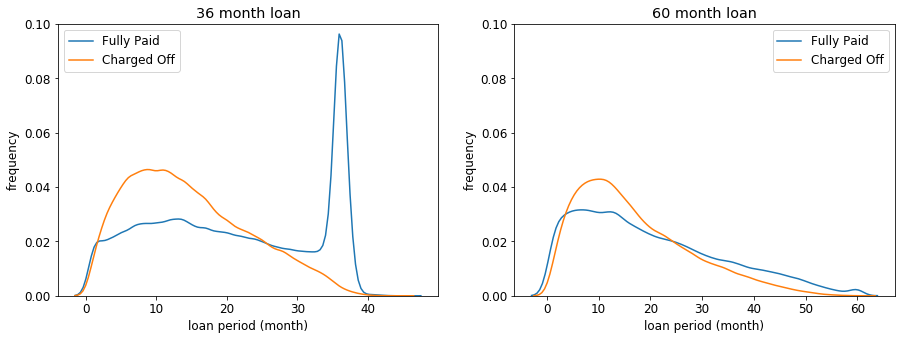

In [113]:
# compare loan period for 36 month vs 60 month loan
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.distplot(df[(df['target']==0) & (df['term']== ' 36 months')]['loan_period'], hist=False, \
             bins=50, rug=False, label = 'Fully Paid', ax=ax1)
sns.distplot(df[(df['target']==1) & (df['term']== ' 36 months')]['loan_period'], hist=False, \
             bins=50,rug=False, label = 'Charged Off', ax=ax1)

ax1.set_title('36 month loan')
ax1.set_xlabel('loan period (month)')
ax1.set_ylabel('frequency')
ax1.set_ylim([0, 0.1])

sns.distplot(df[(df['target']==0) & (df['term']== ' 60 months')]['loan_period'], hist=False, \
             bins=50,rug=False, label = 'Fully Paid', ax=ax2)
sns.distplot(df[(df['target']==1) & (df['term']== ' 60 months')]['loan_period'], hist=False, \
             bins=50,rug=False, label = 'Charged Off', ax=ax2)

ax2.set_title('60 month loan')
ax2.set_xlabel('loan period (month)')
ax2.set_ylabel('frequency')
ax2.set_ylim([0, 0.1])

For borrowers who have 36 month loan, they tend to pay off at the very end of their loans.

### Remove Outliner
- Remove outliner from numerical columns

In [352]:
col_num = df.select_dtypes(include=np.number).columns.tolist()
col_num.remove('target')
col_num.remove('loan_period')

In [349]:
# pick up column to remove outliner
col_num

['int_rate',
 'revol_util',
 'loan_amnt',
 'funded_amnt',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'fico_range_high',
 'fico_range_low',
 'total_pymnt',
 'recoveries']

In [345]:
def remove_outliner(df, col_name):
    '''
    remove outliner (above/below 1.5*IQR)
    input: original dataframe, column name
    output: new dataframe
    '''
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return df[((df[col_name] < upper_bound) & (df[col_name] > lower_bound)).any(axis=1)]

In [350]:
df_rmol = remove_outliner(df,col_num)

In [351]:
df_rmol.head()

,issue_d,earliest_cr_line,last_pymnt_d,issue_year,int_rate,revol_util,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,loan_amnt,funded_amnt,installment,annual_inc,dti,revol_bal,delinq_2yrs,open_acc,pub_rec,fico_range_high,fico_range_low,total_pymnt,recoveries,target,loan_period
0,2015-12-01,2005-01-01,2018-08-01,2015-01-01,13.99,87.4,60 months,C,< 1 year,RENT,Source Verified,Fully Paid,credit_card,OH,21000.0,21000.0,488.53,52000.0,14.47,20374.0,0.0,5.0,0.0,684.0,680.0,27285.807861,0.0,0,32.000657
3,2015-12-01,2002-04-01,2018-08-01,2015-01-01,6.49,34.5,36 months,A,6 years,RENT,Not Verified,Fully Paid,credit_card,PA,10000.0,10000.0,306.45,85000.0,13.07,10464.0,0.0,14.0,1.0,689.0,685.0,10998.971575,0.0,0,32.000657
4,2015-12-01,1994-11-01,2017-04-01,2015-01-01,11.48,39.1,36 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,credit_card,RI,8000.0,8000.0,263.74,42000.0,34.80,7034.0,0.0,8.0,0.0,704.0,700.0,8939.580503,0.0,0,16.000329
5,2015-12-01,1999-02-01,2017-01-01,2015-01-01,8.49,5.7,36 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,major_purchase,SC,20000.0,20000.0,631.26,85000.0,17.61,826.0,1.0,8.0,0.0,709.0,705.0,21538.508977,0.0,0,13.043389
6,2015-12-01,1984-05-01,2017-05-01,2015-01-01,6.49,64.5,36 months,A,10+ years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,NC,28000.0,28000.0,858.05,92000.0,21.60,51507.0,0.0,16.0,0.0,724.0,720.0,29939.017729,0.0,0,16.985975


### Examine each column

In [232]:
print(sorted(df_rmol.columns))

['addr_state', 'annual_inc', 'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'grade', 'home_ownership', 'installment', 'int_rate', 'issue_d', 'issue_year', 'last_pymnt_d', 'loan_amnt', 'loan_period', 'loan_status', 'open_acc', 'pub_rec', 'purpose', 'recoveries', 'revol_bal', 'revol_util', 'target', 'term', 'total_pymnt', 'verification_status']


List description for each column

In [115]:
df_description = pd.read_excel('LCDataDictionary.xlsx').dropna()
df_description_pick = df_description[df_description['LoanStatNew'].isin(df.columns)]
df_description_pick.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
21,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
22,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
23,funded_amnt,The total amount committed to that loan at that point in time.
25,grade,LC assigned loan grade


In [116]:
# show missing data
df.isnull().sum()[df.isnull().sum() >0]/len(df)*100

emp_length    6.804003
dti           0.068367
dtype: float64

In [117]:
#Drop the row where at least one element is missing.
df.dropna(axis=0, inplace=True)

In [118]:
# show missing data
df.isnull().sum()[df.isnull().sum() >0]/len(df)*100

Series([], dtype: float64)

In [235]:
# make general plots to examine each feature
def plot_num(df, col_name, full_name):
    """
    Visualize a numerical variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    """
    # seperate dataframe: 'fully paid' vs 'charged off'
    df_fp = df.loc[df['loan_status'] == 'Fully Paid']
    df_co = df.loc[df['loan_status'] == 'Charged Off']
    
    plt.rcParams.update({'font.size': 12})
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
    # plot1: counts distribution of the variable
    #sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    #sns.distplot(df[col_name], kde=True,ax=ax1)
    sns.distplot(df_fp[col_name], hist=False, rug=False, label = 'Fully Paid', ax=ax1)
    sns.distplot(df_co[col_name], hist=False, rug=False, label = 'Charged Off', ax=ax1)
    
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    #plt.show()
          
    # plot2: box plot of the variable grouped by loan_status
    sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
    ax2.set_xlabel(full_name)
    ax2.set_ylabel('')
    ax2.set_title(full_name)
  
    plt.tight_layout()

In [236]:
def plot_cat(df, col_name, full_name, height=5):
    """
    Visualize a numerical variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    """

    plt.rcParams.update({'font.size': 12})
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,height))
    # plot1: counts distribution of the variable
    sns.countplot(y=col_name, data = df, hue='loan_status',order = df[col_name].value_counts().index, ax=ax1)
    ax1.set_xlabel('Count')
    ax1.set_ylabel('')
    ax1.set_title(full_name)

    #plt.show()
          
    # plot2: box plot of the variable grouped by loan_status
    charged_off_rate = df.groupby(col_name)['loan_status']\
    .value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)
    
    sns.barplot(y=charged_off_rate.index, x=charged_off_rate.values, color = 'steelblue',ax=ax2)
    ax2.set_xlabel('Charged off rate')
    ax2.set_ylabel('')
    ax2.set_title(full_name)

    plt.tight_layout()


#### 1) `issue_d`
- The month which the loan was funded


In [23]:
df['issue_d'].describe()

count                 1238903
unique                     60
top       2016-03-01 00:00:00
freq                    56490
first     2015-01-01 00:00:00
last      2019-12-01 00:00:00
Name: issue_d, dtype: object

#### 2) `earliest_cr_line`
- The month the borrower's earliest reported credit line was opened

In [26]:
df['earliest_cr_line'].describe()

count                 1238903
unique                    742
top       2004-09-01 00:00:00
freq                     9181
first     1933-03-01 00:00:00
last      2016-10-01 00:00:00
Name: earliest_cr_line, dtype: object

#### 3) `last_pymnt_d`
- Last month payment was received

In [28]:
df['last_pymnt_d'].describe()

count                 1238903
unique                     61
top       2019-04-01 00:00:00
freq                    39528
first     2015-02-01 00:00:00
last      2020-02-01 00:00:00
Name: last_pymnt_d, dtype: object

#### 4) `issue_year`


In [30]:
df['issue_year'].describe()

count                 1238903
unique                      5
top       2016-01-01 00:00:00
freq                   394433
first     2015-01-01 00:00:00
last      2019-01-01 00:00:00
Name: issue_year, dtype: object

#### 5) `int_rate`
- Interest Rate on the loan

In [224]:
df['int_rate'].describe()

count    1.154551e+06
mean     1.292402e+01
std      4.934796e+00
min      5.310000e+00
25%      9.170000e+00
50%      1.229000e+01
75%      1.561000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

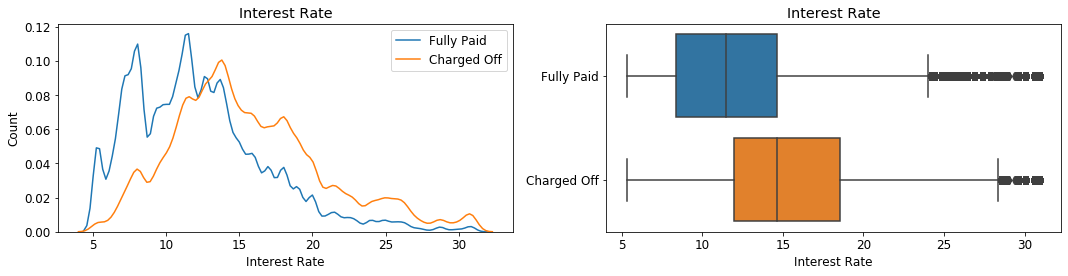

In [237]:
plot_num(df, 'int_rate', 'Interest Rate')

#### 6) `revol_util`
- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [52]:
df['revol_util'].describe()

count    1.238903e+06
mean     4.893088e+01
std      2.476853e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.850000e+01
75%      6.780000e+01
max      1.930000e+02
Name: revol_util, dtype: float64

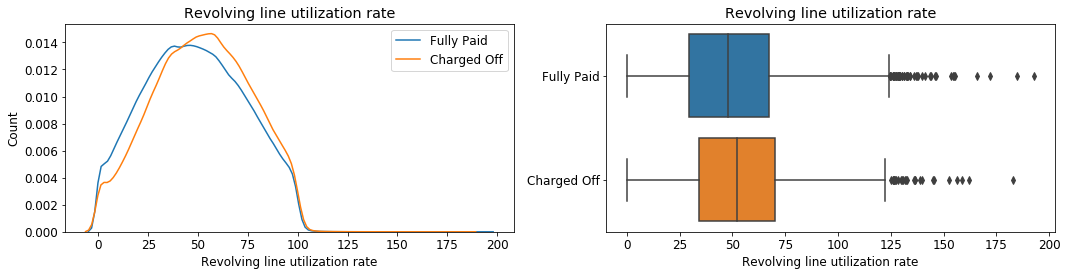

In [238]:
plot_num(df, 'revol_util', 'Revolving line utilization rate')

#### 7) `term`
- The number of payments on the loan. Values are in months and can be either 36 or 60.

In [55]:
df['term'].describe()

count        1238903
unique             2
top        36 months
freq          944502
Name: term, dtype: object

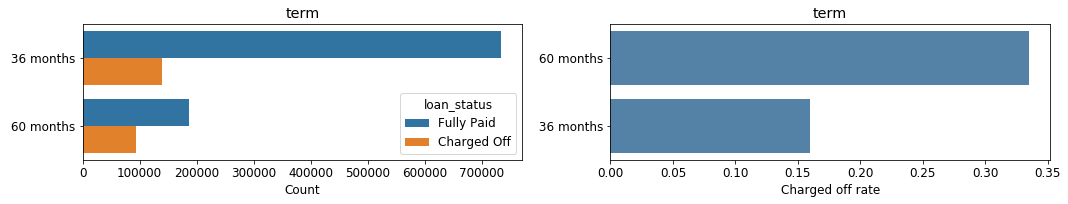

In [239]:
plot_cat(df, 'term', 'term', 3 )

#### 8) `grade`
- LC assigned loan grade

In [66]:
df['grade'].describe()

count     1238903
unique          7
top             B
freq       364119
Name: grade, dtype: object

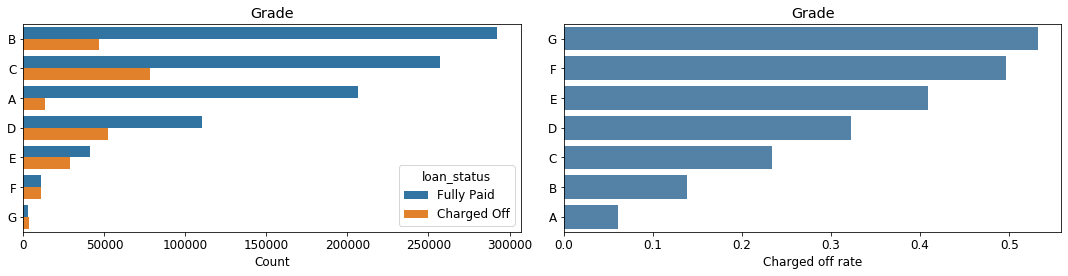

In [240]:
plot_cat(df, 'grade', 'Grade', 4)

#### 9) `emp_length`
- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

In [69]:
df['emp_length'].describe()

count       1154608
unique           11
top       10+ years
freq         411220
Name: emp_length, dtype: object

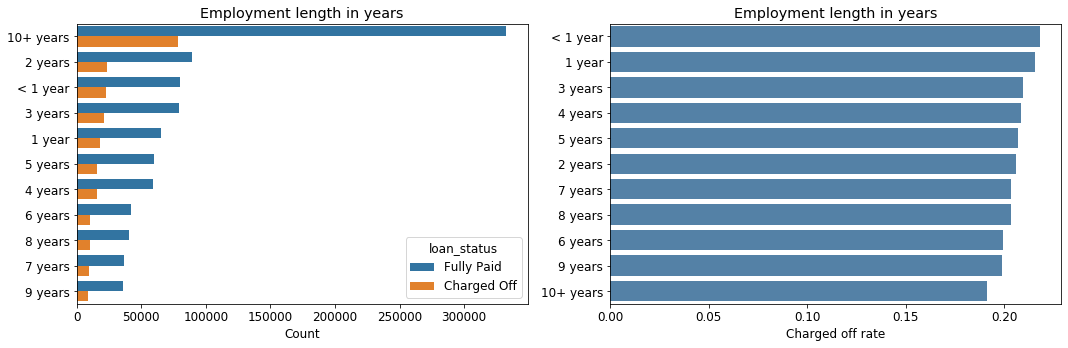

In [241]:
#df.columns#['emp_length'].head()
plot_cat(df, 'emp_length', 'Employment length in years',5)

#### 10) `'home_ownership'`
- The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

In [135]:
df['home_ownership'].describe()

count      1154553
unique           5
top       MORTGAGE
freq        568337
Name: home_ownership, dtype: object

In [137]:
df['home_ownership'].value_counts()

MORTGAGE    568337
RENT        458001
OWN         127429
ANY            784
NONE             2
Name: home_ownership, dtype: int64

In [143]:
# drop NONE
df = df[df['home_ownership']!='NONE']
df['home_ownership'].value_counts()

MORTGAGE    568337
RENT        458001
OWN         127429
ANY            784
Name: home_ownership, dtype: int64

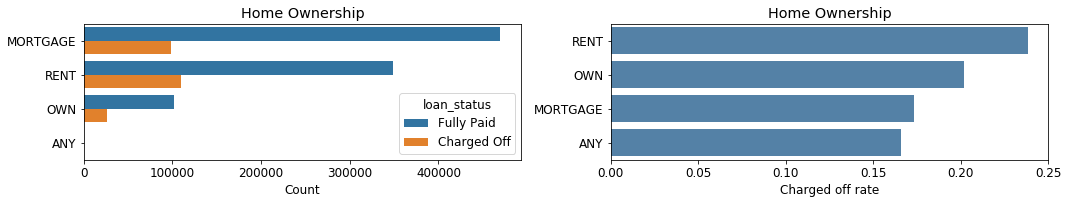

In [210]:
plot_cat(df, 'home_ownership', 'Home Ownership', 3)

#### 11) `verification_status`
- Indicates if income was verified by LC, not verified, or if the income source was verified


In [145]:
df['verification_status'].describe()

count             1154551
unique                  3
top       Source Verified
freq               501776
Name: verification_status, dtype: object

In [147]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

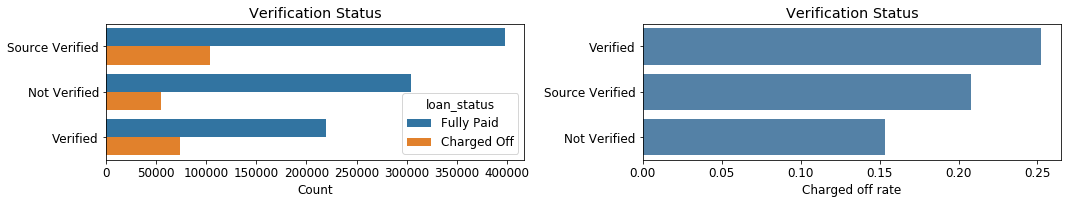

In [242]:
plot_cat(df,'verification_status', 'Verification Status',3)

#### 12) `'purpose'`
- A category provided by the borrower for the loan request.

In [149]:
df['purpose'].describe()

count                1154551
unique                    14
top       debt_consolidation
freq                  660155
Name: purpose, dtype: object

In [150]:
df['purpose'].unique()

array(['credit_card', 'major_purchase', 'debt_consolidation',
       'small_business', 'home_improvement', 'other', 'house', 'medical',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

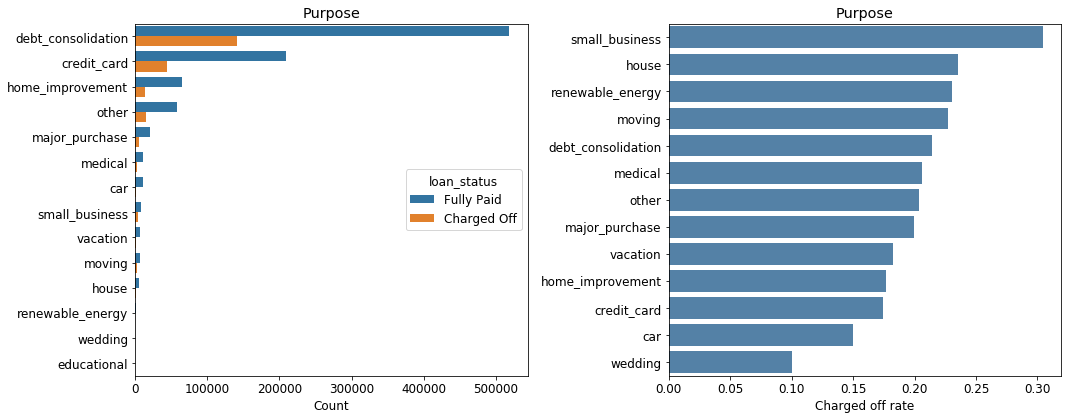

In [243]:
plot_cat(df,'purpose', 'Purpose',6)

#### 13) `addr_state`
- The state provided by the borrower in the loan application

In [152]:
df['addr_state'].describe()

count     1154551
unique         50
top            CA
freq       161641
Name: addr_state, dtype: object

In [153]:
df['addr_state'].unique()

array(['OH', 'PA', 'RI', 'SC', 'NC', 'AZ', 'VA', 'NY', 'KS', 'AL', 'NM',
       'TX', 'MD', 'WA', 'GA', 'LA', 'IL', 'CO', 'FL', 'MI', 'MO', 'IN',
       'WI', 'CA', 'VT', 'TN', 'MA', 'NJ', 'OR', 'SD', 'MN', 'DC', 'DE',
       'NH', 'NE', 'AR', 'NV', 'MT', 'WV', 'HI', 'OK', 'WY', 'KY', 'CT',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID'], dtype=object)

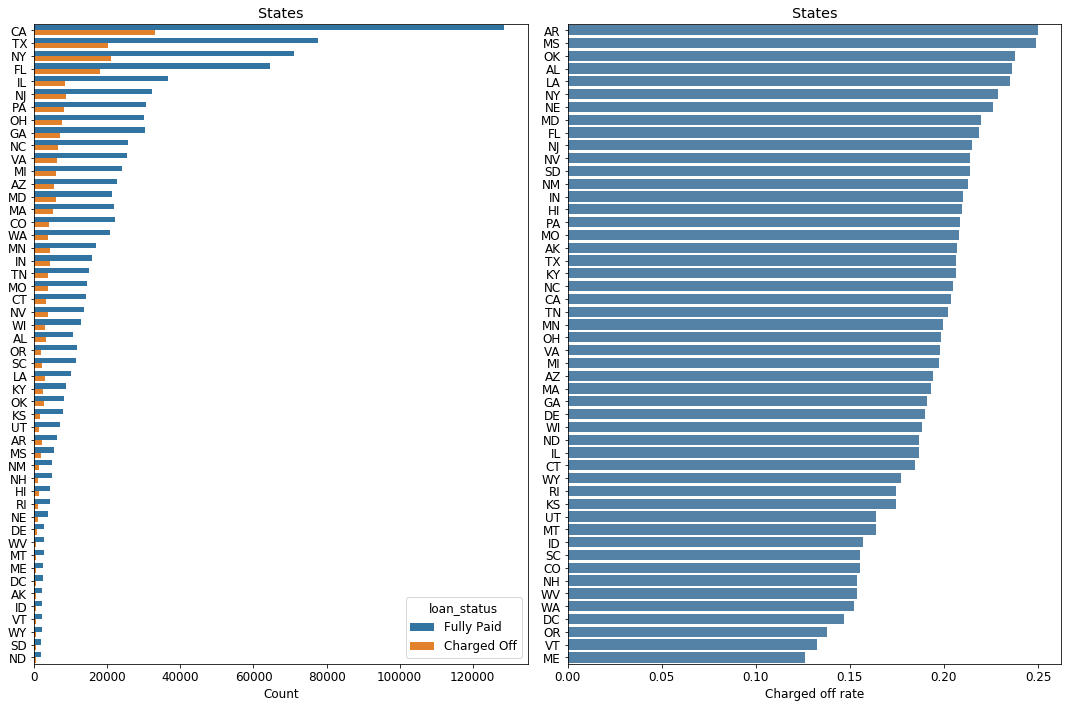

In [244]:
plot_cat(df,'addr_state', 'States',10)

#### 14) `loan_amnt`
- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value

In [212]:
df['loan_amnt'].describe()

count    1.154551e+06
mean     1.482716e+04
std      9.138443e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.220000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

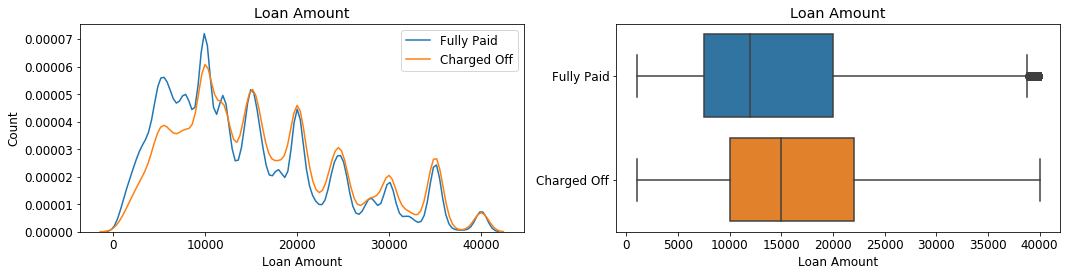

In [245]:
plot_num(df,'loan_amnt', 'Loan Amount')

#### 15) `funded_amnt`
- The total amount committed to that loan at that point in time.

In [214]:
df['funded_amnt'].describe()

count    1.154551e+06
mean     1.482715e+04
std      9.138443e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.220000e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt, dtype: float64

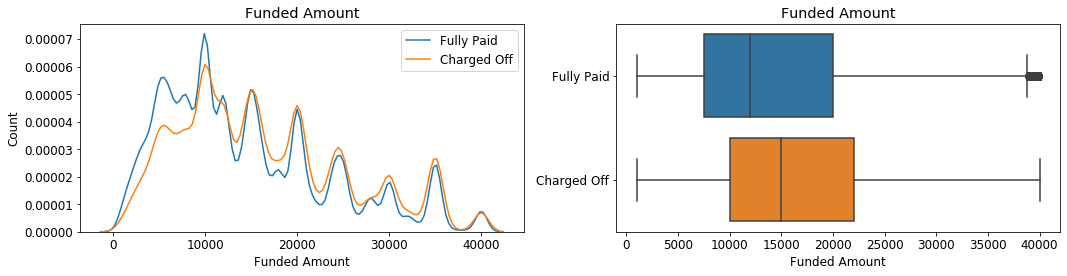

In [246]:
plot_num(df, 'funded_amnt', 'Funded Amount')

#### 16) `installment`
- The monthly payment owed by the borrower if the loan originates.

In [216]:
df['installment'].describe()

count    1.154551e+06
mean     4.479892e+02
std      2.739269e+02
min      1.401000e+01
25%      2.487100e+02
50%      3.770400e+02
75%      6.010450e+02
max      1.719830e+03
Name: installment, dtype: float64

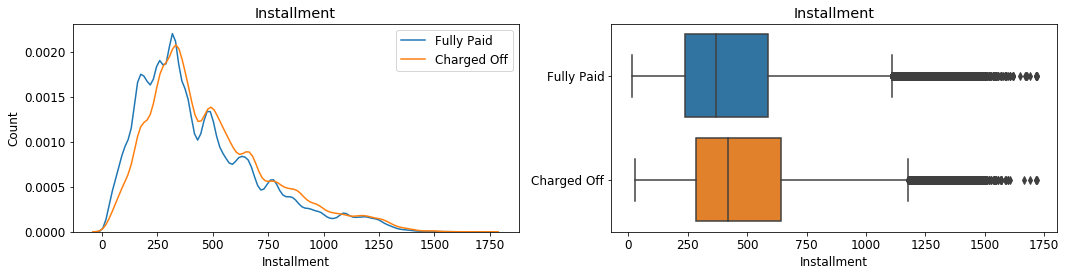

In [247]:
plot_num(df,'installment', 'Installment')

#### 17) `annual_inc`
- The self-reported annual income provided by the borrower during registration.

In [295]:
def remove_outliner(data, column_name):
    '''
    remove outliner (above/below 1.5*IQR)
    input: original dataframe, column name
    output: new dataframe
    '''
    q1, q3 = np.percentile(df[column_name], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return df[((df[column_name] < upper_bound) & (df[column_name] > lower_bound))]

In [276]:
df['annual_inc'].describe()

count    1.154551e+06
mean     8.046548e+04
std      1.287824e+05
min      0.000000e+00
25%      4.890000e+04
50%      6.800000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [296]:
# remove outliner
df_annual_inc_rmoutlier = remove_outliner(df, 'annual_inc')
df_annual_inc_rmoutlier['annual_inc'].describe()

count    1.094880e+06
mean     7.103039e+04
std      3.132345e+04
min      0.000000e+00
25%      4.800000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.641000e+05
Name: annual_inc, dtype: float64

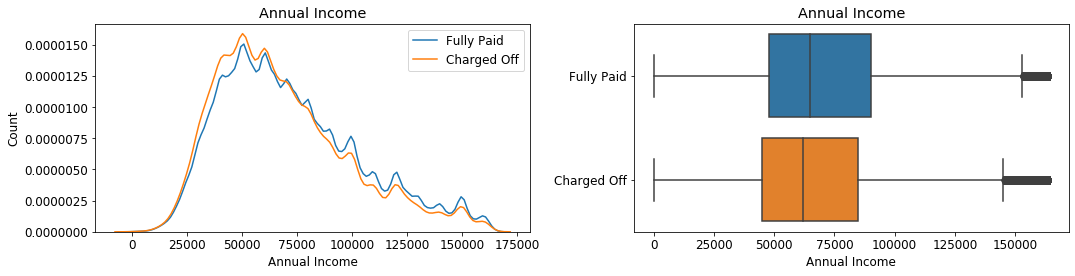

In [297]:
# after outliner remove
plot_num(df_annual_inc_rmoutlier,'annual_inc', 'Annual Income')

 The feature of annual income contains outliner. 

'dti',
       'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'total_pymnt', 'recoveries', 'target', 'loan_period'

#### 18) 'dti'
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

In [299]:
df['dti'].describe()

count    1.154551e+06
mean     1.874129e+01
std      1.136332e+01
min     -1.000000e+00
25%      1.198000e+01
50%      1.794000e+01
75%      2.465000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [301]:
# remove outliner
df_dti_rmoutlier = remove_outliner(df, 'dti')
df_dti_rmoutlier['dti'].describe()

count    1.146840e+06
mean     1.839745e+01
std      8.593468e+00
min     -1.000000e+00
25%      1.194000e+01
50%      1.786000e+01
75%      2.450000e+01
max      4.365000e+01
Name: dti, dtype: float64

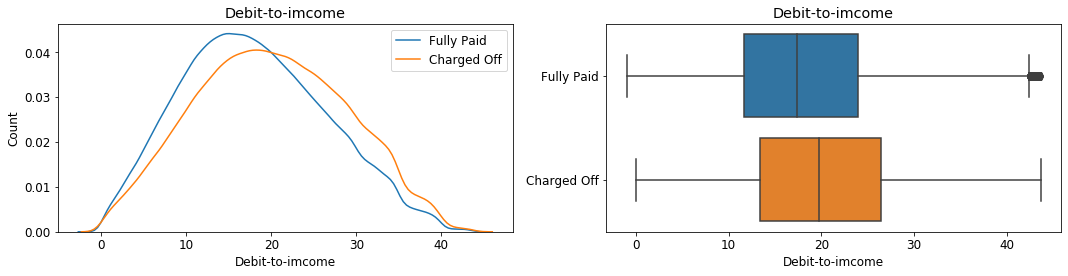

In [302]:
plot_num(df_dti_rmoutlier,'dti', 'Debit-to-imcome')

 - the borrowers who are charged off have higher dti
 - The dti feature contains outliner. 

#### 19) `revol_bal`
- Total credit revolving balance

In [303]:
df['revol_bal'].describe()

count    1.154551e+06
mean     1.655442e+04
std      2.341443e+04
min      0.000000e+00
25%      5.801000e+03
50%      1.101700e+04
75%      1.978900e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [305]:
# remove outliner
df_revol_bal_rmoutlier = remove_outliner(df, 'revol_bal')
df_revol_bal_rmoutlier['revol_bal'].describe()

count    1.079730e+06
mean     1.248168e+04
std      9.128088e+03
min      0.000000e+00
25%      5.498000e+03
50%      1.024100e+04
75%      1.743500e+04
max      4.077000e+04
Name: revol_bal, dtype: float64

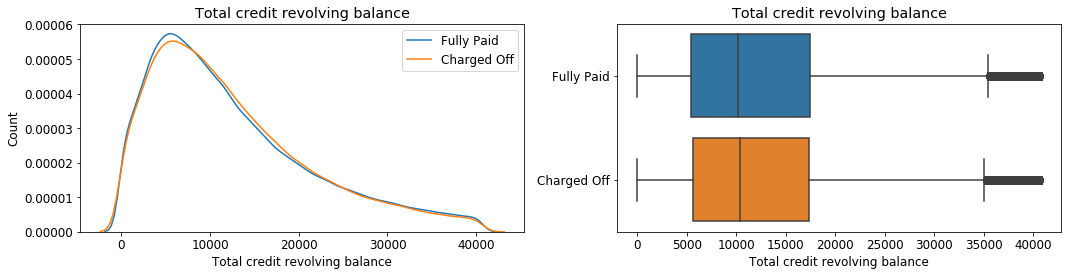

In [306]:
plot_num(df_revol_bal_rmoutlier,'revol_bal', 'Total credit revolving balance')

 - The 'revol_bal' feature contains outliner. 

####  20) `'delinq_2yrs'`

In [307]:
df['delinq_2yrs'].describe()

count    1.154551e+06
mean     3.319836e-01
std      9.139701e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.200000e+01
Name: delinq_2yrs, dtype: float64